## Display the xml element tree

In [ ]:
from pptlayout.extractors.run_extractors import run_extractors
from json import dumps
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "emu")
print(dumps(info, indent=4))

In [ ]:
from pptlayout.llm.call_ollama import generate_slide_layout_suggestions
from pptlayout.llm.prompts import build_slide_layout_suggestion_prompts
from tqdm import tqdm
import os
# Call OLLAMA
output_dir = os.path.join(os.curdir, "test_output")
suggestions_list = []
for slide_info in tqdm(info["slides"]):
    slide_id = slide_info["slide_id"]
    slide_output_dir = os.path.join(output_dir, f"{slide_id}")
    if os.path.exists(os.path.join(slide_output_dir, "suggestions.txt")):
        with open(os.path.join(slide_output_dir, "suggestions.txt"), "r") as f:
            suggestions = f.read()
        suggestions_list.append(suggestions)
        continue
    prompt = build_slide_layout_suggestion_prompts(
        json_input=slide_info, 
        slide_width=info["slide_width"],
        slide_height=info["slide_height"]
        )
    suggestions = generate_slide_layout_suggestions(
        model_name="llama3.1:70b",
        prompt=prompt,
        temperature=0.5,
        )
    suggestions_list.append(suggestions)
    # save
    os.makedirs(slide_output_dir, exist_ok=True)
    with open(os.path.join(slide_output_dir, "suggestions.txt"), "w") as f:
        f.write(suggestions)

In [ ]:
from pptlayout.llm.parser import extract_json
json_list = []
for suggestions in suggestions_list:
    json_data = extract_json(suggestions)
    json_list.append(json_data)

In [ ]:
from json import dumps

# print(dumps(json_list[12], indent=4))
for json in json_list:
    print(json)

In [ ]:
from pptlayout.visualizers.layout_visualizer import generate_comparison_grid

slides = info["slides"]
# Generate comparison grid
comparison_grid = generate_comparison_grid(
    slides,
    json_list,
    slide_width=info["slide_width"],
    slide_height=info["slide_height"]
    )

In [1]:
from pptlayout.extractors.run_extractors import run_extractors
from json import dumps
# Replace with your actual PPTX file path
pptx_path = "/data/tianyuhu/PPTLayout/data/pptx/ZK7FNUZ33GBBCG7CFVYS56TQCTD72CJR.pptx"

# Run extractors
info = run_extractors(pptx_path, "emu")
print(dumps(info, indent=4))


from pptlayout.llm.call_ollama import generate_slide_layout_suggestions
from pptlayout.llm.prompts import build_slide_layout_suggestion_prompts
test_image = "/data/tianyuhu/PPTLayout/notebooks/test_input/image.png"
prompt = build_slide_layout_suggestion_prompts(
    json_input=info["slides"][4],
    slide_width=info["slide_width"],
    slide_height=info["slide_height"],
    )
response = generate_slide_layout_suggestions(
    model_name="llama3.2-vision:11b",
    prompt=prompt,
    image=test_image,
    )
print(response)


{
    "slide_width": 9144000,
    "slide_height": 6858000,
    "slides": [
        {
            "slide_id": 256,
            "slide_name": "",
            "shapes": [
                {
                    "name": "PlaceHolder 1",
                    "shape_id": 22,
                    "shape_type": "PLACEHOLDER",
                    "measurement_unit": "emu",
                    "height": 2228760,
                    "width": 7772400,
                    "left": 685800,
                    "top": 1371240,
                    "text": "Design for a 2 MW graphite target\u000b\u000bfor a neutrino beam",
                    "placeholder_type": "TITLE"
                },
                {
                    "name": "PlaceHolder 2",
                    "shape_id": 23,
                    "shape_type": "PLACEHOLDER",
                    "measurement_unit": "emu",
                    "height": 1752480,
                    "width": 8153640,
                    "left": 380520,
                 

In [2]:
from pptlayout.llm.parser import extract_json

# Extract JSON data
json_data = extract_json(response)
print(json_data)

{   "slide_id": 260,   "slide_name": "",   "shapes": [     {       "name": "PlaceHolder 1",       "shape_id": 38,       "shape_type": "PLACEHOLDER",       "measurement_unit": "emu",       "height": 533520,       "width": 6477120,       "left": 1523880,       "top": 152280,       "text": "NuMI baffle as prototype of target",       "placeholder_type": "TITLE"     },     {       "name": "",       "shape_id": 39,       "shape_type": "AUTO_SHAPE",       "measurement_unit": "emu",       "height": 762120,       "width": 2286000,       "left": 609480,       "top": 5486400,       "text": ""     },     {       "name": "",       "shape_id": 40,       "shape_type": "AUTO_SHAPE",       "measurement_unit": "emu",       "height": 228600,       "width": 609480,       "left": 7772400,       "top": 3581280,       "text": ""     },     {       "name": "",       "shape_id": 41,       "shape_type": "AUTO_SHAPE",       "measurement_unit": "emu",       "height": 152280,       "width": 1447560,       "left": 

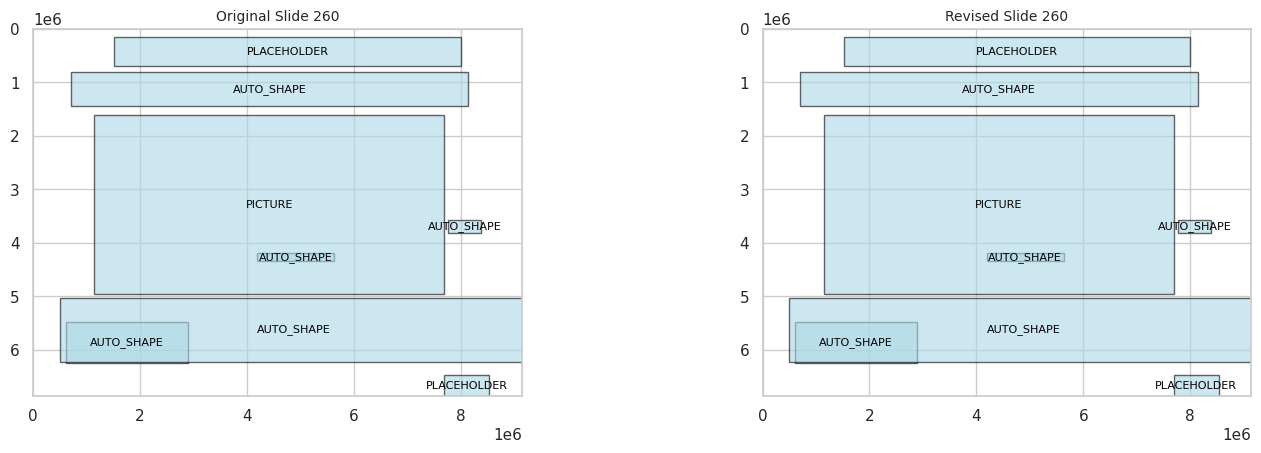

In [5]:
from pptlayout.visualizers.layout_visualizer import generate_comparison_grid

generate_comparison_grid(
    [info["slides"][4]],
    [json_data],
    slide_width=info["slide_width"],
    slide_height=info["slide_height"]
    )
    